# Normal Equation Method

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Normal Equation for Linear Regression:**

The Normal Equation provides a closed-form solution for $\mathbf{\theta}$ :
$$
\mathbf{\theta} = \left( \mathbf{X}^T \mathbf{X} \right)^{-1} \mathbf{X}^T \mathbf{y}
$$


## Implementation

In [ ]:
class LinearRegression_NE():
    def __init__(self):
        self.weights = None

    def fit(self,X,y):
        m = X.shape[0]
        X = np.hstack((np.ones((m,1)),np.array(X)))  # Creating column of 1's for bias term
        y = np.array(y).reshape(-1)

        self.weights = np.linalg.pinv(X.T@X)@(X.T@y)

    def predict(self,X):
        if self.weights is None:
            raise ValueError("Model has not been fitted yet")
            
        m = X.shape[0]
        X = np.hstack((np.ones((m,1)),np.array(X)))
        return X@self.weights
    
    def get_weights(self):
        return self.weights


## Sample Data Test & Comparison

In [9]:
from sklearn.linear_model import LinearRegression

# Sample DataFrame with features and a target column
data = {
    'Feature1': [1, 2, 3, 4, 5],
    'Feature2': [2, 1, 3, 5, 4],
    'Feature3': [5, 3, 2, 4, 1],
    'Target':    [10, 9, 15, 21, 19]
}

df = pd.DataFrame(data)

# Prepare X and y
X = df[['Feature1','Feature2','Feature3']].values
y = df['Target'].values

In [12]:
# Implemented Linear Regression Model
model_ne = LinearRegression_NE()
model_ne.fit(X, y)
predictions_ne = model_ne.predict(X)

print("Predictions from Normal Equation model:", predictions_ne)

# Scikit-learn Linear Regression for comparison
model_sklearn = LinearRegression()
model_sklearn.fit(X, y)
predictions_sklearn = model_sklearn.predict(X)

print("Predictions from scikit-learn model:", predictions_sklearn)


Predictions from Normal Equation model: [10.3  8.8 14.8 20.8 19.3]
Predictions from scikit-learn model: [10.3  8.8 14.8 20.8 19.3]


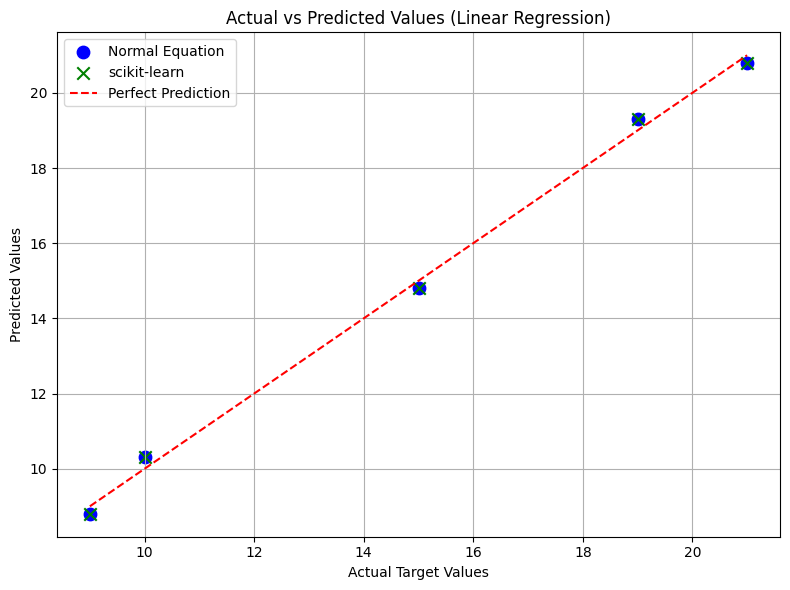

In [15]:
# Plotting the results

plt.figure(figsize=(8, 6))
plt.scatter(y, predictions_ne, color='blue', label='Normal Equation', marker='o', s=80)
plt.scatter(y, predictions_sklearn, color='green', label='scikit-learn', marker='x', s=80)
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', label='Perfect Prediction')

plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
print("Learned Weights from Normal Equation model:", model_ne.get_weights())
print("Learned Weights from scikit-learn model:", [model_sklearn.intercept_] + list(model_sklearn.coef_))

Learned Weights from Normal Equation model: [4.30000000e+00 1.00000000e+00 2.50000000e+00 5.68434189e-14]
Learned Weights from scikit-learn model: [4.300000000000001, 0.9999999999999998, 2.500000000000001, -6.275240856268005e-16]


The tiny differences (e.g., 5.68e-14 or -6.27e-16) are due to floating-point precision.

# Gradient Descent 

In [ ]:
def LinearRegression_GD():

    def __init__(self):
        pass
    
    def fit(X,y):
        return X